In [1]:
#Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import gmaps
import os
import json
import time

# Import API key
from api_keys import g_key

#Access maps with unique API key
gmaps.configure(api_key=g_key)

In [2]:
#Pulling Data from CSV
file = "archive/winemag-data-130k-v2.csv"
#Creating Base Dataframe
df = pd.read_csv(file, index_col=0)
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
Index,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [3]:
#Dropping usless columns
df = df.drop(columns= ['region_2', 'taster_twitter_handle'])
df

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
Index,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [4]:
#Reorganizing order of header
df = df[['winery','title','variety','country','province','region_1','price','points','taster_name','description', 'designation']]
df

,winery,title,variety,country,province,region_1,price,points,taster_name,description,designation
Index,,,,,,,,,,,
0,Nicosia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Italy,Sicily & Sardinia,Etna,NaN,87,Kerin O’Keefe,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco
1,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Portugal,Douro,NaN,15.0,87,Roger Voss,"This is ripe and fruity, a wine that is smooth...",Avidagos
2,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,US,Oregon,Willamette Valley,14.0,87,Paul Gregutt,"Tart and snappy, the flavors of lime flesh and...",NaN
3,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,US,Michigan,Lake Michigan Shore,13.0,87,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest
4,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,US,Oregon,Willamette Valley,65.0,87,Paul Gregutt,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block
...,...,...,...,...,...,...,...,...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Germany,Mosel,NaN,28.0,90,Anna Lee C. Iijima,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese
129967,Citation,Citation 2004 Pinot Noir (Oregon),Pinot Noir,US,Oregon,Oregon,75.0,90,Paul Gregutt,Citation is given as much as a decade of bottl...,NaN
129968,Domaine Gresser,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,France,Alsace,Alsace,30.0,90,Roger Voss,Well-drained gravel soil gives this wine its c...,Kritt


In [5]:
#Renaming/Cleaning headers 
df = df.rename(columns={'variety': 'Grape Type',
                       'region_1': 'Sub-Region',
                       'taster_name': 'Wine Critic',
                       'designation': 'Additional Designations',
                       'winery': 'Winery',
                       'title': 'Name of Wine',
                       })
df

,Winery,Name of Wine,Grape Type,country,province,Sub-Region,price,points,Wine Critic,description,Additional Designations
Index,,,,,,,,,,,
0,Nicosia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Italy,Sicily & Sardinia,Etna,NaN,87,Kerin O’Keefe,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco
1,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Portugal,Douro,NaN,15.0,87,Roger Voss,"This is ripe and fruity, a wine that is smooth...",Avidagos
2,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,US,Oregon,Willamette Valley,14.0,87,Paul Gregutt,"Tart and snappy, the flavors of lime flesh and...",NaN
3,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,US,Michigan,Lake Michigan Shore,13.0,87,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest
4,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,US,Oregon,Willamette Valley,65.0,87,Paul Gregutt,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block
...,...,...,...,...,...,...,...,...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Germany,Mosel,NaN,28.0,90,Anna Lee C. Iijima,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese
129967,Citation,Citation 2004 Pinot Noir (Oregon),Pinot Noir,US,Oregon,Oregon,75.0,90,Paul Gregutt,Citation is given as much as a decade of bottl...,NaN
129968,Domaine Gresser,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,France,Alsace,Alsace,30.0,90,Roger Voss,Well-drained gravel soil gives this wine its c...,Kritt


In [6]:
#Cleaning Headers
df.columns = df.columns.str.title()

In [7]:
df

,Winery,Name Of Wine,Grape Type,Country,Province,Sub-Region,Price,Points,Wine Critic,Description,Additional Designations
Index,,,,,,,,,,,
0,Nicosia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Italy,Sicily & Sardinia,Etna,NaN,87,Kerin O’Keefe,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco
1,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Portugal,Douro,NaN,15.0,87,Roger Voss,"This is ripe and fruity, a wine that is smooth...",Avidagos
2,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,US,Oregon,Willamette Valley,14.0,87,Paul Gregutt,"Tart and snappy, the flavors of lime flesh and...",NaN
3,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,US,Michigan,Lake Michigan Shore,13.0,87,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest
4,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,US,Oregon,Willamette Valley,65.0,87,Paul Gregutt,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block
...,...,...,...,...,...,...,...,...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Germany,Mosel,NaN,28.0,90,Anna Lee C. Iijima,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese
129967,Citation,Citation 2004 Pinot Noir (Oregon),Pinot Noir,US,Oregon,Oregon,75.0,90,Paul Gregutt,Citation is given as much as a decade of bottl...,NaN
129968,Domaine Gresser,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,France,Alsace,Alsace,30.0,90,Roger Voss,Well-drained gravel soil gives this wine its c...,Kritt


In [8]:
#Dropping Nan values in important data metrics 
df = df.dropna(axis=0, how= 'any', subset= ['Price','Points','Wine Critic'])
df

,Winery,Name Of Wine,Grape Type,Country,Province,Sub-Region,Price,Points,Wine Critic,Description,Additional Designations
Index,,,,,,,,,,,
1,Quinta dos Avidagos,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Portugal,Douro,NaN,15.0,87,Roger Voss,"This is ripe and fruity, a wine that is smooth...",Avidagos
2,Rainstorm,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,US,Oregon,Willamette Valley,14.0,87,Paul Gregutt,"Tart and snappy, the flavors of lime flesh and...",NaN
3,St. Julian,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,US,Michigan,Lake Michigan Shore,13.0,87,Alexander Peartree,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest
4,Sweet Cheeks,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,US,Oregon,Willamette Valley,65.0,87,Paul Gregutt,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block
5,Tandem,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Spain,Northern Spain,Navarra,15.0,87,Michael Schachner,Blackberry and raspberry aromas show a typical...,Ars In Vitro
...,...,...,...,...,...,...,...,...,...,...,...
129966,Dr. H. Thanisch (Erben Müller-Burggraef),Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Germany,Mosel,NaN,28.0,90,Anna Lee C. Iijima,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese
129967,Citation,Citation 2004 Pinot Noir (Oregon),Pinot Noir,US,Oregon,Oregon,75.0,90,Paul Gregutt,Citation is given as much as a decade of bottl...,NaN
129968,Domaine Gresser,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,France,Alsace,Alsace,30.0,90,Roger Voss,Well-drained gravel soil gives this wine its c...,Kritt


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


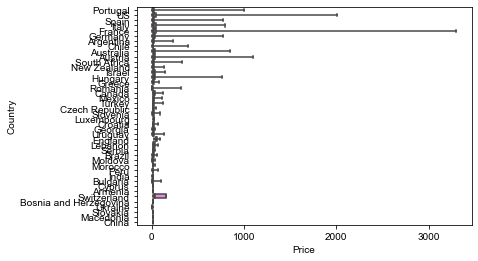

In [9]:
# Displaying boxplot/IQR of prices of wines by country
country = sns.boxplot(y="Country", x="Price", data=df, whis=np.inf)
#country = sns.stripplot(y="Country", x="Price", data=df, color=".3")
country = sns.set(rc={'figure.figsize':(20,80)}, font_scale= 1.5)

In [10]:
#Describing the main data frame
df.describe()

,Price,Points
count,96479.000000,96479.000000
mean,34.998642,88.585723
std,43.057234,2.951305
min,4.000000,80.000000
25%,17.000000,87.000000
50%,25.000000,88.000000
75%,40.000000,91.000000
max,3300.000000,100.000000


In [11]:
#Grouping Data by Country
country_group = df.groupby(by= 'Country')
#Finding mean of country data
country_df = country_group.mean()
country_df

,Price,Points
Country,,
Argentina,24.452438,86.707701
Armenia,14.500000,87.500000
Australia,37.492277,88.805680
Austria,30.782157,90.204228
Bosnia and Herzegovina,12.500000,86.500000
Brazil,23.765957,84.659574
Bulgaria,14.645390,87.936170
Canada,35.636364,89.367589
Chile,20.869686,86.514286


In [12]:
#Sorting Data by Price(Ascending)
price_df = country_df.sort_values(by= 'Price')
price_df

,Price,Points
Country,,
Ukraine,9.214286,84.071429
Bosnia and Herzegovina,12.500000,86.500000
India,13.333333,90.222222
Armenia,14.500000,87.500000
Bulgaria,14.645390,87.936170
Romania,15.241667,86.400000
Macedonia,15.583333,86.833333
Slovakia,16.000000,87.000000
Cyprus,16.272727,87.181818


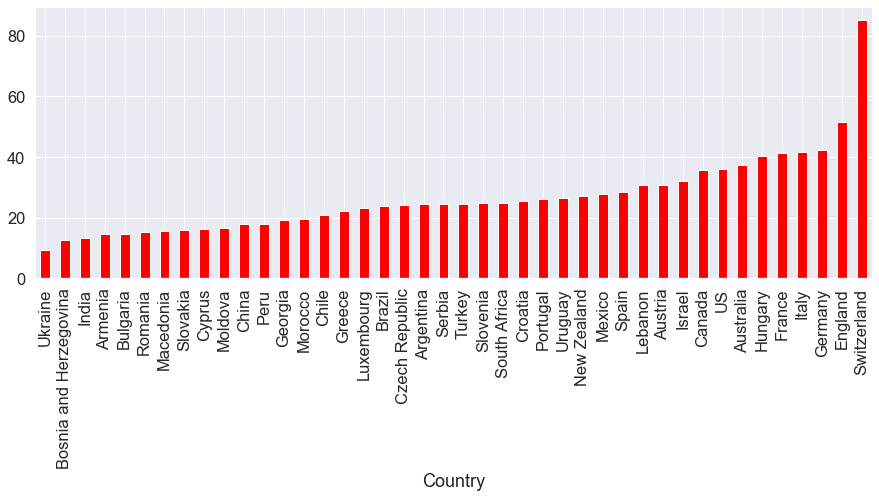

In [13]:
#Visualizing average price of a bottle of reviewed wine per country
price_df["Price"].plot(kind="bar", facecolor="red", figsize=(15,5));

In [14]:
#Examining Switzerland data
swiss_df = df[df['Country'] == 'Switzerland']
swiss_df

,Winery,Name Of Wine,Grape Type,Country,Province,Sub-Region,Price,Points,Wine Critic,Description,Additional Designations
Index,,,,,,,,,,,
14187,Robert Gilliard,Robert Gilliard 2012 Dôle des Monts Pinot Noir...,Pinot Noir-Gamay,Switzerland,Valais,NaN,30.0,90,Jeff Jenssen,"A Swiss blend of Pinot Noir and Gamay, this de...",Dôle des Monts
21791,Gantenbein,Gantenbein 2011 Pinot Noir (Switzerland),Pinot Noir,Switzerland,Switzerland,NaN,160.0,89,Jeff Jenssen,This wine is cherry red with soft brown tinges...,NaN
32423,Gantenbein,Gantenbein 2012 Pinot Noir (Switzerland),Pinot Noir,Switzerland,Switzerland,NaN,160.0,89,Jeff Jenssen,This wine has a bouquet of tart cherry with a ...,NaN
50589,Delea,Delea 2004 Carato Merlot (Ticino),Merlot,Switzerland,Ticino,NaN,38.0,83,Susan Kostrzewa,"A soft blackberry, vanilla and plum nose is fo...",Carato
81814,Gantenbein,Gantenbein 2012 Pinot Noir (Switzerland),Pinot Noir,Switzerland,Switzerland,NaN,160.0,89,Jeff Jenssen,This wine has a bouquet of tart cherry with a ...,NaN
83632,Robert Gilliard,Robert Gilliard 2012 Les Murettes Chasselas (V...,Chasselas,Switzerland,Valais,NaN,28.0,90,Jeff Jenssen,Vanilla and lemon curd aromas bring nuance and...,Les Murettes
129280,Château d'Auvernier,Château d'Auvernier 2012 White (Neuchâtel),White Blend,Switzerland,Neuchâtel,NaN,21.0,90,Jeff Jenssen,The bouquet of this wine shows condensed fruit...,NaN


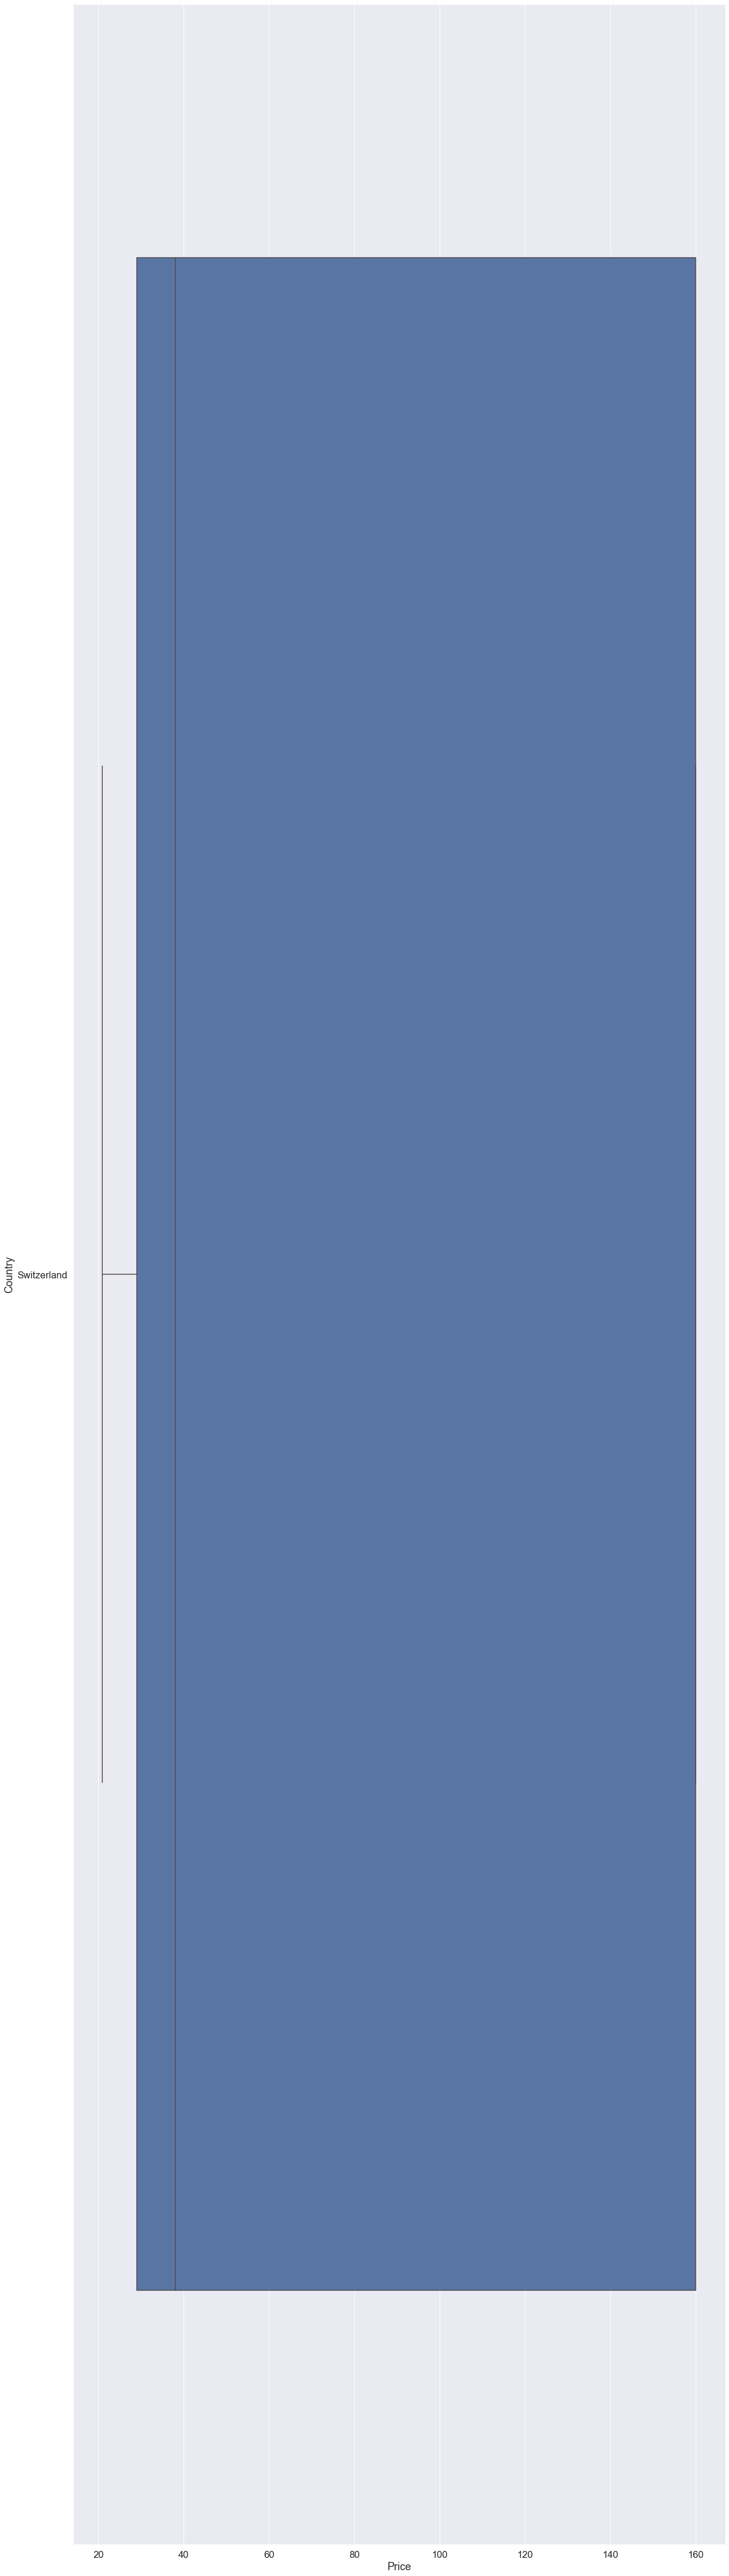

In [15]:
#Boxplot of Switzerland to try and uncover any outliers
#add a box plot + stripchart
swiss = sns.boxplot(x="Price", y="Country", data=swiss_df, whis=np.inf)
#swiss = sns.stripplot(x="Price", y="Country", data=swiss_df, color=".3")

In [16]:
#Describing Swiss Data
swiss_df.describe()

,Price,Points
count,7.000000,7.000000
mean,85.285714,88.571429
std,70.063577,2.507133
min,21.000000,83.000000
25%,29.000000,89.000000
50%,38.000000,89.000000
75%,160.000000,90.000000
max,160.000000,90.000000


In [17]:
#Sorting Data by Points(Ascending)
points_df = country_df.sort_values(by= 'Points')
points_df

,Price,Points
Country,,
Peru,18.062500,83.562500
Ukraine,9.214286,84.071429
Brazil,23.765957,84.659574
Mexico,27.800000,85.261538
Romania,15.241667,86.400000
Bosnia and Herzegovina,12.500000,86.500000
Chile,20.869686,86.514286
Argentina,24.452438,86.707701
Uruguay,26.403670,86.752294


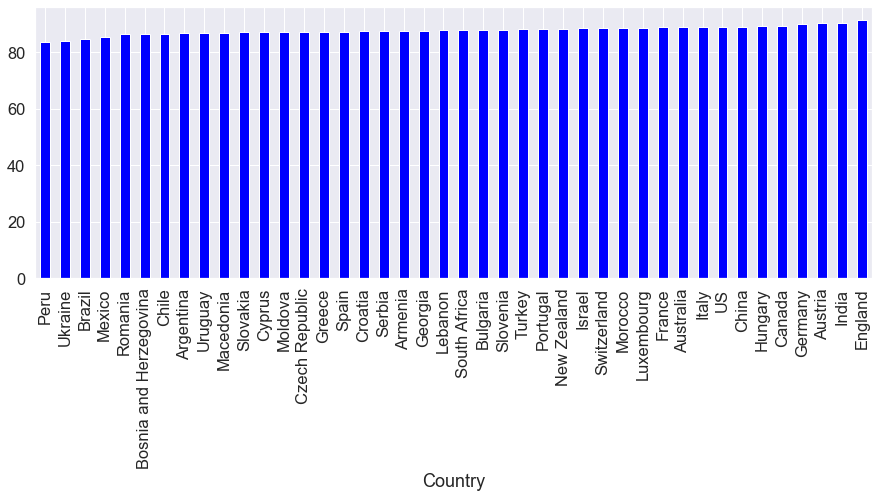

In [18]:
#Plotting bar chart showing avg points given to a btl reviewed wine in each country
points_df["Points"].plot(kind="bar", facecolor="blue", figsize=(15,5));

In [19]:
#Adding new column to uncover the average $ it costs consumers per point rating in each country
country_df['Average Price per Point ($)'] = round(country_df['Price']/country_df['Points'],2)
country_df

,Price,Points,Average Price per Point ($)
Country,,,
Argentina,24.452438,86.707701,0.28
Armenia,14.500000,87.500000,0.17
Australia,37.492277,88.805680,0.42
Austria,30.782157,90.204228,0.34
Bosnia and Herzegovina,12.500000,86.500000,0.14
Brazil,23.765957,84.659574,0.28
Bulgaria,14.645390,87.936170,0.17
Canada,35.636364,89.367589,0.40
Chile,20.869686,86.514286,0.24


In [20]:
#Sorting data by Avg Price per point
ppp_df = country_df.sort_values(by= 'Average Price per Point ($)')
ppp_df

,Price,Points,Average Price per Point ($)
Country,,,
Ukraine,9.214286,84.071429,0.11
Bosnia and Herzegovina,12.500000,86.500000,0.14
India,13.333333,90.222222,0.15
Armenia,14.500000,87.500000,0.17
Bulgaria,14.645390,87.936170,0.17
Romania,15.241667,86.400000,0.18
Slovakia,16.000000,87.000000,0.18
Macedonia,15.583333,86.833333,0.18
Cyprus,16.272727,87.181818,0.19


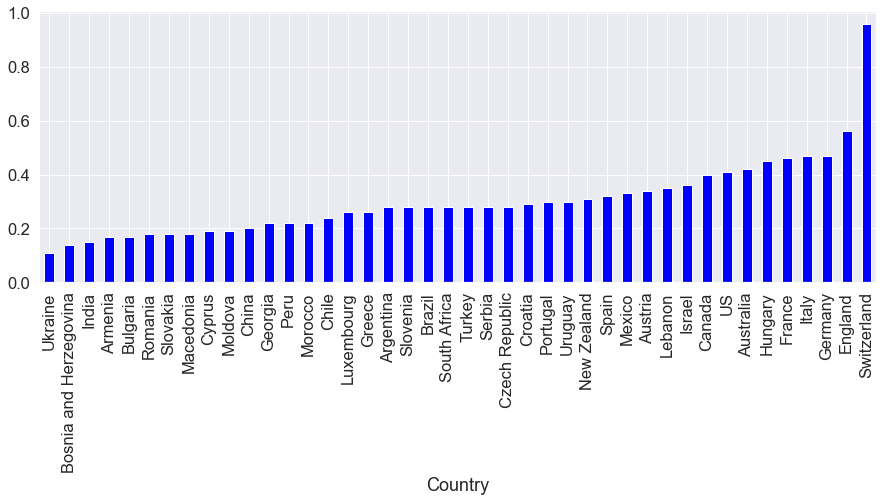

In [21]:
#Plotting Avg PPP data
ppp_df["Average Price per Point ($)"].plot(kind="bar", facecolor="blue", figsize=(15,5));

In [22]:
#Displaying how many wines were reviewed per country
dfg = df.groupby(by= 'Country').count()
dfg = dfg[['Wine Critic']]
dfg = dfg.sort_values(by= 'Wine Critic')
dfg

,Wine Critic
Country,
Slovakia,1
China,1
Armenia,2
Bosnia and Herzegovina,2
Luxembourg,6
Switzerland,7
India,9
Cyprus,11
Macedonia,12


<AxesSubplot:xlabel='Country'>

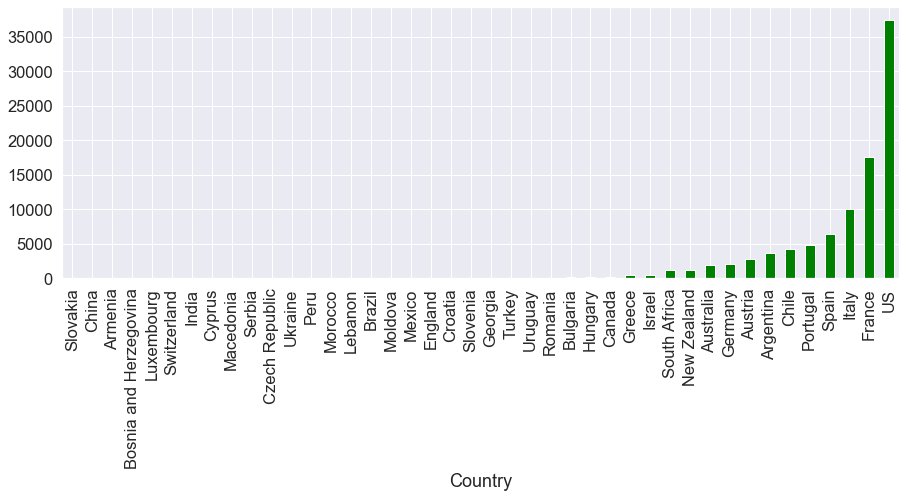

In [23]:
#Plotting in bar chart the amount of reviews per country
dfg['Wine Critic'].plot(kind='bar', facecolor='green', figsize=(15,5))

In [24]:
#Grouping Data by Wine Critic
critic_group = df.groupby(by= 'Wine Critic')

critic_df = critic_group.count()
critic_df

,Winery,Name Of Wine,Grape Type,Country,Province,Sub-Region,Price,Points,Description,Additional Designations
Wine Critic,,,,,,,,,,
Alexander Peartree,413,413,413,413,413,399,413,413,413,268
Anna Lee C. Iijima,4369,4369,4369,4369,4369,2438,4369,4369,4369,3469
Anne Krebiehl MW,3398,3398,3398,3389,3389,1360,3398,3398,3398,2894
Carrie Dykes,138,138,138,138,138,138,138,138,138,96
Christina Pickard,6,6,6,6,6,6,6,6,6,2
Fiona Adams,27,27,27,27,27,18,27,27,27,17
Jeff Jenssen,491,491,491,469,469,0,491,491,491,383
Jim Gordon,4171,4171,4171,4171,4171,4165,4171,4171,4171,2656
Joe Czerwinski,5012,5012,5012,5010,5010,3324,5012,5012,5012,3339


In [25]:
#Counting how many reviews each critic has done
crit_df = critic_df[['Winery']]
crit_df

,Winery
Wine Critic,
Alexander Peartree,413
Anna Lee C. Iijima,4369
Anne Krebiehl MW,3398
Carrie Dykes,138
Christina Pickard,6
Fiona Adams,27
Jeff Jenssen,491
Jim Gordon,4171
Joe Czerwinski,5012


In [26]:
#Sorting data in Ascending order
crit_sort = crit_df.sort_values(by= 'Winery')
crit_sort

,Winery
Wine Critic,
Christina Pickard,6
Fiona Adams,27
Carrie Dykes,138
Alexander Peartree,413
Jeff Jenssen,491
Mike DeSimone,504
Susan Kostrzewa,1073
Lauren Buzzeo,1713
Anne Krebiehl MW,3398


<AxesSubplot:xlabel='Wine Critic'>

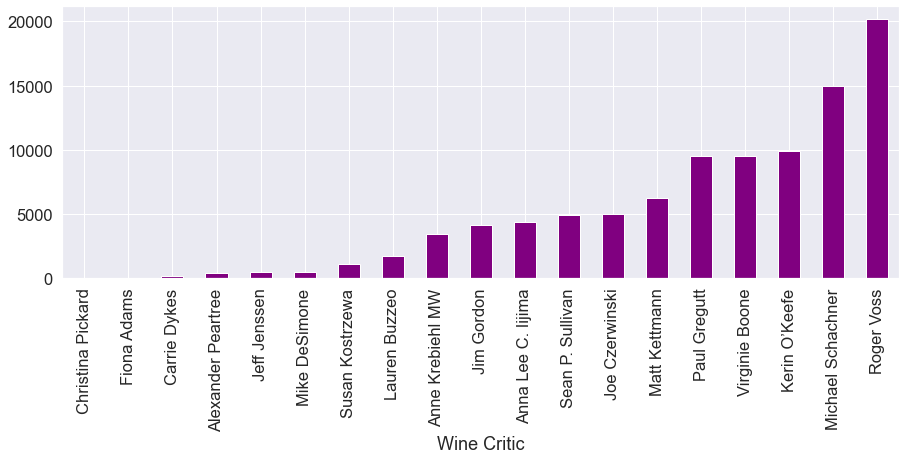

In [27]:
#Plotting bar chart to show how many reviews done per critic
crit_sort['Winery'].plot(kind='bar', facecolor='purple', figsize=(15,5))

In [28]:
#Finding the mean for Price and Points in a Wine Crtic Groupby
crit_mean = critic_group.mean()
crit_mean

,Price,Points
Wine Critic,,
Alexander Peartree,29.053269,85.854722
Anna Lee C. Iijima,29.790112,88.405127
Anne Krebiehl MW,31.230135,90.612419
Carrie Dykes,30.753623,86.384058
Christina Pickard,29.333333,87.833333
Fiona Adams,31.148148,86.888889
Jeff Jenssen,22.234216,88.319756
Jim Gordon,26.935507,88.625989
Joe Czerwinski,35.175579,88.539505


In [29]:
#Sorting Data by Points in Ascending
crit_points = crit_mean.sort_values(by= 'Points')
crit_points

,Price,Points
Wine Critic,,
Alexander Peartree,29.053269,85.854722
Carrie Dykes,30.753623,86.384058
Susan Kostrzewa,22.908667,86.620690
Fiona Adams,31.148148,86.888889
Michael Schachner,25.231155,86.909237
Lauren Buzzeo,24.492703,87.564507
Christina Pickard,29.333333,87.833333
Jeff Jenssen,22.234216,88.319756
Anna Lee C. Iijima,29.790112,88.405127


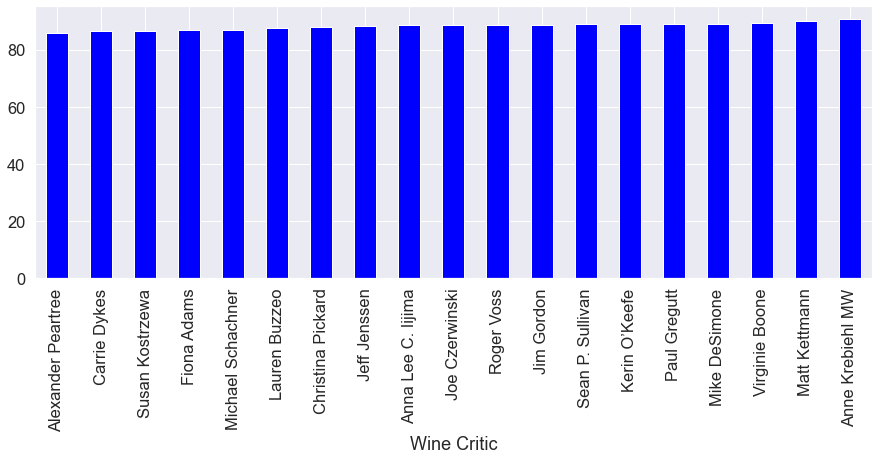

In [30]:
#Plotting mean of points by critic 
crit_points["Points"].plot(kind="bar", facecolor="blue", figsize=(15,5));

In [31]:
#Sorting wine critic data by price in ascending
crit_price = crit_mean.sort_values(by= 'Price')
crit_price

,Price,Points
Wine Critic,,
Jeff Jenssen,22.234216,88.319756
Susan Kostrzewa,22.908667,86.620690
Lauren Buzzeo,24.492703,87.564507
Michael Schachner,25.231155,86.909237
Jim Gordon,26.935507,88.625989
Mike DeSimone,28.164683,89.099206
Alexander Peartree,29.053269,85.854722
Christina Pickard,29.333333,87.833333
Anna Lee C. Iijima,29.790112,88.405127


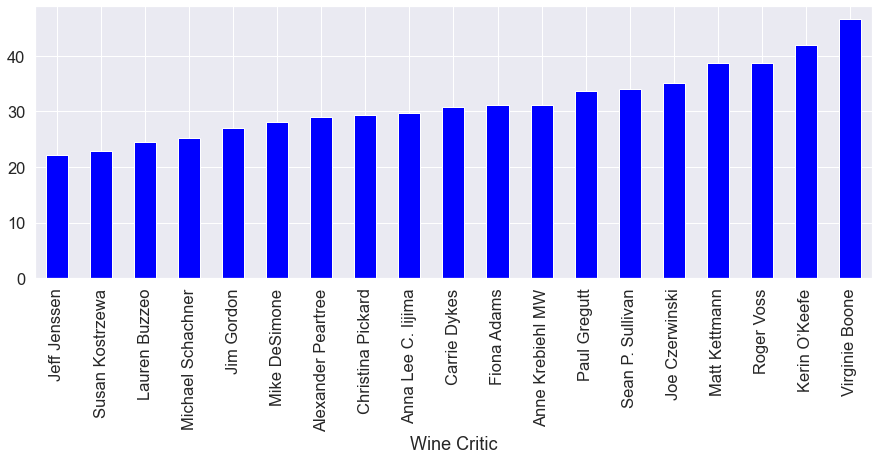

In [32]:
#Plotting bar chart to show avg price of btl reviewed by each critic
crit_price["Price"].plot(kind="bar", facecolor="blue", figsize=(15,5));

In [33]:
#Creating new column calculating the avergae price of the wine per point given by each critic
crit_mean['Average Price per Point ($)'] = round(crit_mean['Price']/crit_mean['Points'],2)
crit_mean

,Price,Points,Average Price per Point ($)
Wine Critic,,,
Alexander Peartree,29.053269,85.854722,0.34
Anna Lee C. Iijima,29.790112,88.405127,0.34
Anne Krebiehl MW,31.230135,90.612419,0.34
Carrie Dykes,30.753623,86.384058,0.36
Christina Pickard,29.333333,87.833333,0.33
Fiona Adams,31.148148,86.888889,0.36
Jeff Jenssen,22.234216,88.319756,0.25
Jim Gordon,26.935507,88.625989,0.30
Joe Czerwinski,35.175579,88.539505,0.40


In [34]:
#Sorting the new average in ascending
crit_avg = crit_mean.sort_values(by= 'Average Price per Point ($)')
crit_avg

,Price,Points,Average Price per Point ($)
Wine Critic,,,
Jeff Jenssen,22.234216,88.319756,0.25
Susan Kostrzewa,22.908667,86.620690,0.26
Lauren Buzzeo,24.492703,87.564507,0.28
Michael Schachner,25.231155,86.909237,0.29
Jim Gordon,26.935507,88.625989,0.30
Mike DeSimone,28.164683,89.099206,0.32
Christina Pickard,29.333333,87.833333,0.33
Alexander Peartree,29.053269,85.854722,0.34
Anna Lee C. Iijima,29.790112,88.405127,0.34


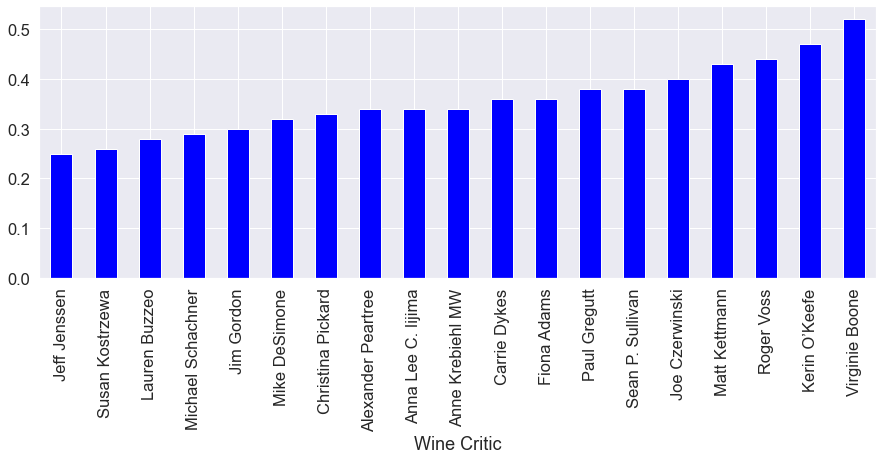

In [35]:
#Plotting bar chart to show the new sorted data
crit_avg["Average Price per Point ($)"].plot(kind="bar", facecolor="blue", figsize=(15,5));

In [ ]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



query_url = f"https://maps.googleapis.com/maps/api/geocode/json?key={api_key}&component=country:"

# define count of pass throughs
count_one = 0
set_one = 1

In [ ]:
countries =[]
province = []
